In [2]:
import uproot
file = uproot.open('/Users/albaburgosmondejar/Desktop/uproot-tutorial-file.root')

file
file.keys()

['Events;1']

In [3]:
file.classnames()

{'Events;1': 'TTree'}

the key Events refers to a TTree object
name:type 
; refers to cycle number

In [4]:
file['Events;1']

<TTree 'Events' (6 branches) at 0x000110962220>

In [5]:
tree = file['Events']
tree.keys()

['nMuon', 'Muon_pt', 'Muon_eta', 'Muon_phi', 'Muon_mass', 'Muon_charge']

In [6]:
tree.arrays()

<Array [{nMuon: 2, Muon_pt: [...], ...}, ...] type='100000 * {nMuon: uint32...'>

In [8]:
branches = tree.arrays()
branches["nMuon"]

<Array [2, 2, 1, 4, 4, 3, 2, ..., 1, 0, 3, 2, 3, 2, 3] type='100000 * uint32'>

In [9]:
branches["Muon_pt"]


<Array [[10.8, 15.7], ..., [11.4, ..., 4.97]] type='100000 * var * float32'>

In [10]:
branches[0].tolist()

{'nMuon': 2,
 'Muon_pt': [10.763696670532227, 15.736522674560547],
 'Muon_eta': [1.0668272972106934, -0.563786506652832],
 'Muon_phi': [-0.03427272289991379, 2.5426154136657715],
 'Muon_mass': [0.10565836727619171, 0.10565836727619171],
 'Muon_charge': [-1, -1]}

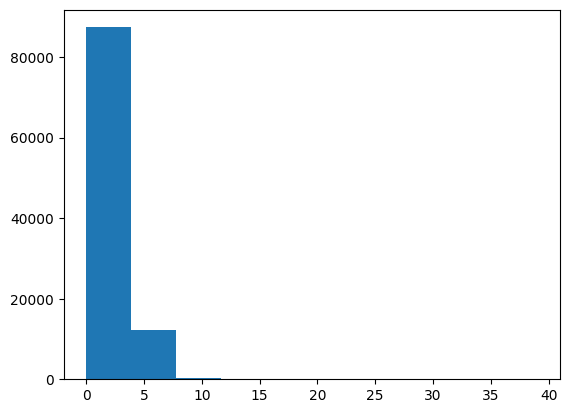

In [11]:
import matplotlib.pyplot as plt
plt.hist(branches["nMuon"])
plt.show()

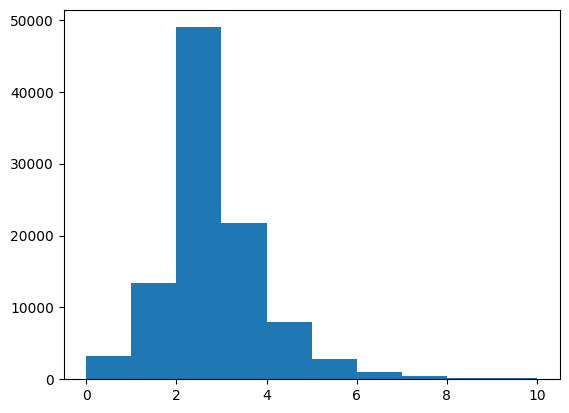

In [12]:
plt.hist(branches["nMuon"], bins=10, range=(0, 10))
plt.show()

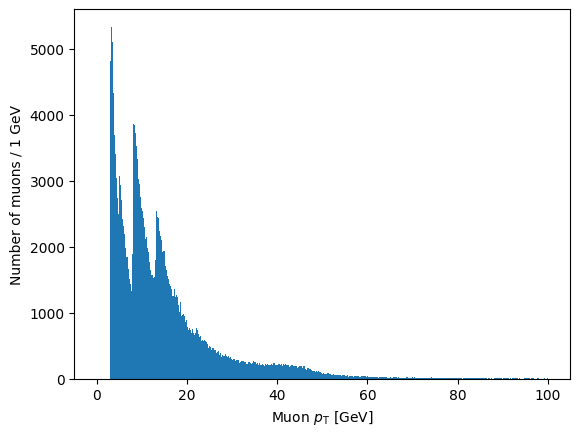

In [13]:
import awkward as ak
plt.hist(ak.flatten(branches["Muon_pt"]), bins=500, range=(0, 100))
plt.xlabel('Muon $p_{\mathrm{T}}$ [GeV]')
plt.ylabel('Number of muons / 1 GeV')
plt.show()
plt.show()

use awkward as awk to flatten jagged arrays


In [14]:
sum(branches["nMuon"])
len(ak.flatten(branches['Muon_pt']))

235286

In [15]:
branches['nMuon'] == 1

<Array [False, False, True, ..., False, False, False] type='100000 * bool'>

In [16]:
import numpy as np
single_muon_mask = branches['nMuon'] == 1
np.sum(single_muon_mask)
branches['Muon_pt'][single_muon_mask]

<Array [[3.28], [3.84], ..., [13.3], [9.48]] type='13447 * var * float32'>

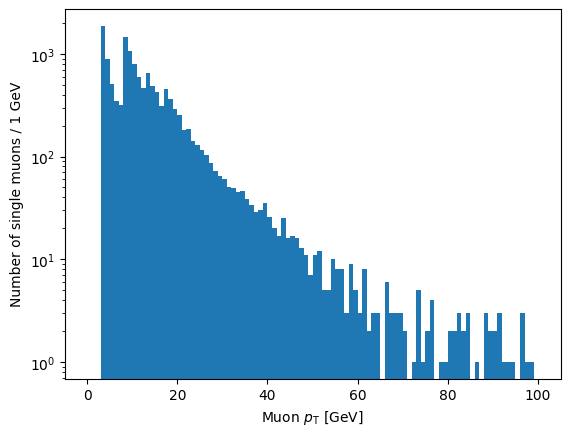

In [17]:
plt.hist(ak.flatten(branches['Muon_pt'][single_muon_mask]), bins=100, range=(0, 100))
plt.xlabel('Muon $p_{\mathrm{T}}$ [GeV]')
plt.ylabel('Number of single muons / 1 GeV')
plt.yscale('log')
plt.show()

this is missing the hump at 45GeV! so the hump is not coming from single muons

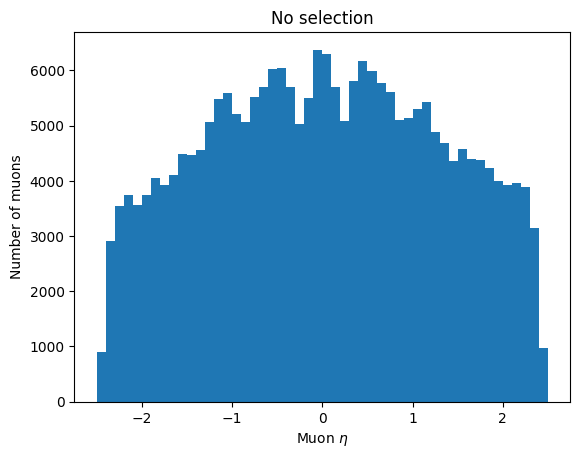

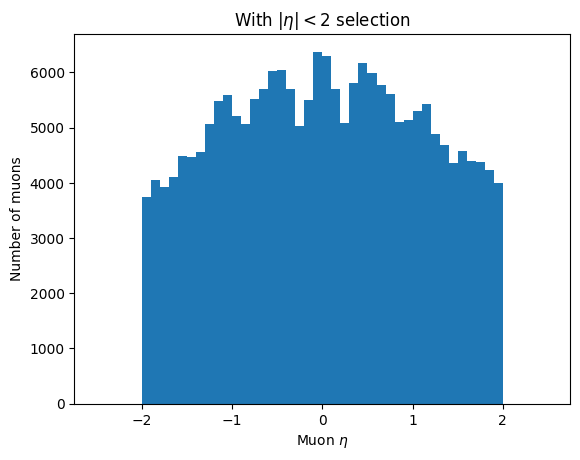

In [18]:
eta_mask = abs(branches['Muon_eta']) < 2
plt.hist(ak.flatten(branches['Muon_eta']), bins=50, range=(-2.5, 2.5))
plt.title('No selection')
plt.xlabel('Muon $\eta$')
plt.ylabel('Number of muons')
plt.show()

plt.hist(ak.flatten(branches['Muon_eta'][eta_mask]), bins=50, range=(-2.5, 2.5))
plt.title('With $|\eta| < 2$ selection')
plt.xlabel('Muon $\eta$')
plt.ylabel('Number of muons')
plt.show()

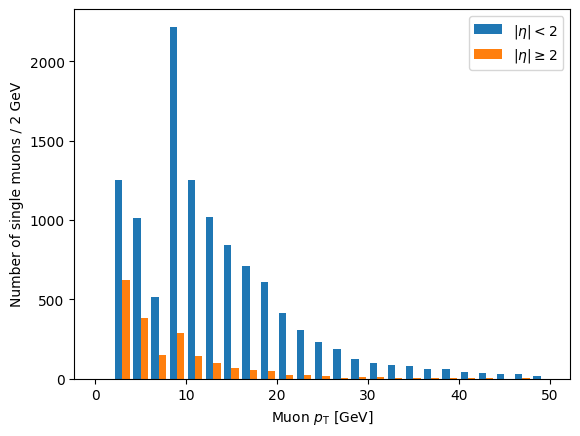

In [19]:
plt.hist([ak.flatten(branches['Muon_pt'][single_muon_mask & eta_mask]),
          ak.flatten(branches['Muon_pt'][single_muon_mask & ~eta_mask])],
         label=['$|\eta| < 2$', '$|\eta| \geq 2$'],
         bins=25, range=(0, 50))
plt.xlabel('Muon $p_{\mathrm{T}}$ [GeV]')
plt.ylabel('Number of single muons / 2 GeV')
plt.legend()
plt.show()

Calculate DeltaR for Dimuon events

In [20]:
two_muons_mask = branches['nMuon'] == 2
import vector
muon_p4 = vector.zip({'pt': branches['Muon_pt'], 'eta': branches['Muon_eta'], 'phi': branches['Muon_phi'], 'mass': branches['Muon_mass']})
two_muons_p4 = muon_p4[two_muons_mask]
two_muons_p4

<MomentumArray4D [[{rho: 10.8, phi: ..., ...}, ...], ...] type='48976 * var...'>

In [21]:
two_muons_p4.pt
two_muons_p4.eta
two_muons_p4.phi
two_muons_p4.E
two_muons_p4.mass

<Array [[0.106, 0.106], ..., [0.106, 0.106]] type='48976 * var * float32'>

In [22]:
first_muon_p4 = two_muons_p4[:, 0]
second_muon_p4 = two_muons_p4[:, 1]
first_muon_p4.deltaR(second_muon_p4)

<Array [3.05, 2.92, 3.16, 0.0955, ..., 4.47, 3.06, 2.88] type='48976 * float32'>

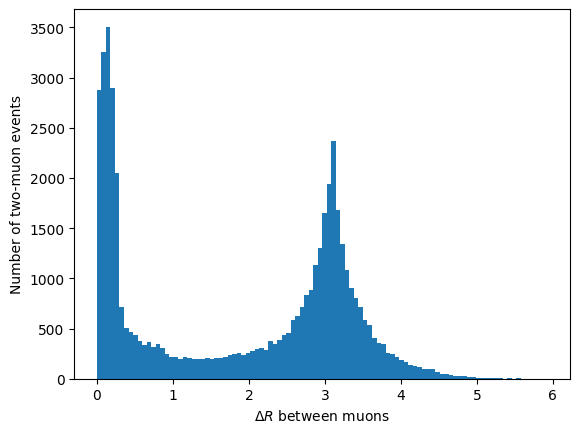

In [23]:
plt.hist(first_muon_p4.deltaR(second_muon_p4), bins=100)
plt.xlabel('$\Delta R$ between muons')
plt.ylabel('Number of two-muon events')
plt.show()

Addition of 4/vectors of first and second muon

In [24]:
sum_p4 = first_muon_p4 + second_muon_p4
sum_p4

<MomentumArray4D [{rho: 8.79, phi: 1.83, ...}, ...] type='48976 * Momentum4...'>

0.10565837128802819
0.10565837


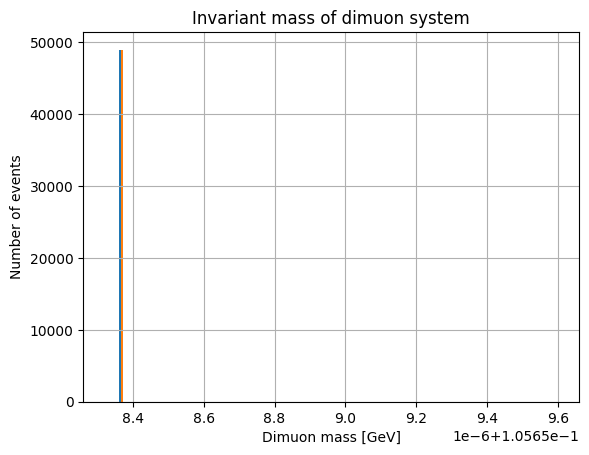

In [47]:
two_muons_mask = branches['nMuon'] == 2
import vector
muon_p4 = vector.zip({'pt': branches['Muon_pt'], 'eta': branches['Muon_eta'], 'phi': branches['Muon_phi'], 'mass': branches['Muon_mass']})
two_muons_p4 = muon_p4[two_muons_mask]
print(ak.mean(muon_p4.mass))
mean_mass = ak.mean(muon_p4.mass)
print(f"{mean_mass:.8g}")

plt.hist(two_muons_p4.mass, bins=100)
plt.xlabel('Dimuon mass [GeV]')
plt.ylabel('Number of events')
plt.title('Invariant mass of dimuon system')
plt.grid(True)

